<a href="https://colab.research.google.com/github/gargarushee/techfutures_workshop/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================================================
# SECTION 1: SETUP AND INSTALLATION
# ============================================================================

# Install required packages
!pip install langgraph
!pip install langsmith
!pip install langchain-openai
!pip install langgraph_supervisor
!pip install python-dotenv
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.77
    Uninstalling langchain-core-0.3.77:
      Successfully uninstalled langchain-core-0.3.77
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you h

# Setup API KEYS!!

1. OPENAI_API_KEY https://platform.openai.com/api-keys

In [ ]:
# Set your API keys here
OPENAI_API_KEY = ""

In [ ]:
import os

# IPython display components for visualization
from IPython.display import Image, display

In [ ]:
# =============================================================================
# ENVIRONMENT SETUP
# =============================================================================

def _set_env(var: str, value: str) -> None:
  os.environ[var] = value

# Set API keys from the variables defined earlier
_set_env("OPENAI_API_KEY", OPENAI_API_KEY)

# Lets create a demo Supervisor graph!!

In [ ]:
from typing import Literal
from langchain_openai import ChatOpenAI
from langgraph.types import Command
from langgraph.graph import StateGraph, MessagesState, START, END

model = ChatOpenAI()

def supervisor(state: MessagesState) -> Command[Literal["agent_1", "agent_2", END]]:
    # you can pass relevant parts of the state to the LLM (e.g., state["messages"])
    # to determine which agent to call next. a common pattern is to call the model
    # with a structured output (e.g. force it to return an output with a "next_agent" field)
    response = model.invoke(...)
    # route to one of the agents or exit based on the supervisor's decision
    # if the supervisor returns "__end__", the graph will finish execution
    return Command(goto=response["next_agent"])

def agent_1(state: MessagesState) -> Command[Literal["supervisor"]]:
    # you can pass relevant parts of the state to the LLM (e.g., state["messages"])
    # and add any additional logic (different models, custom prompts, structured output, etc.)
    response = model.invoke(...)
    return Command(
        goto="supervisor",
        update={"messages": [response]},
    )

def agent_2(state: MessagesState) -> Command[Literal["supervisor"]]:
    response = model.invoke(...)
    return Command(
        goto="supervisor",
        update={"messages": [response]},
    )

builder = StateGraph(MessagesState)
builder.add_node(supervisor)
builder.add_node(agent_1)
builder.add_node(agent_2)

builder.add_edge(START, "supervisor")

supervisor = builder.compile()

🎨 Generating workflow diagram...


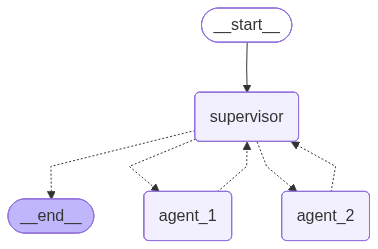

In [ ]:
# =============================================================================
# WORKFLOW VISUALIZATION
# =============================================================================

print("🎨 Generating workflow diagram...")
workflow_diagram = supervisor.get_graph().draw_mermaid_png()
display(Image(workflow_diagram))